# I2A2 - Bone Age Regression





This a competition to create a model to predict the Bone Age of children from a Hand X-Ray.

https://www.kaggle.com/c/i2a2-bone-age-regression/overview


This solution reached 16th place in the competition.

## Analyse data

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('/kaggle/input/i2a2-bone-age-regression/train.csv')
df_train.head()

,fileName,patientSex,boneage
0,1377.png,F,180
1,1378.png,F,12
2,1379.png,F,94
3,1380.png,M,120
4,1381.png,F,82


Girls and boys like women and men have so much different ossea structure, for that, for this solution, we'll train two models one to apply to girls Hand X-Ray and another to boys.

In [3]:
df_train_femele = df_train.query('patientSex == "F"')
df_train_femele.describe()

,boneage
count,5778.000000
mean,117.880235
std,37.908112
min,4.000000
25%,94.000000
50%,120.000000
75%,144.000000
max,216.000000


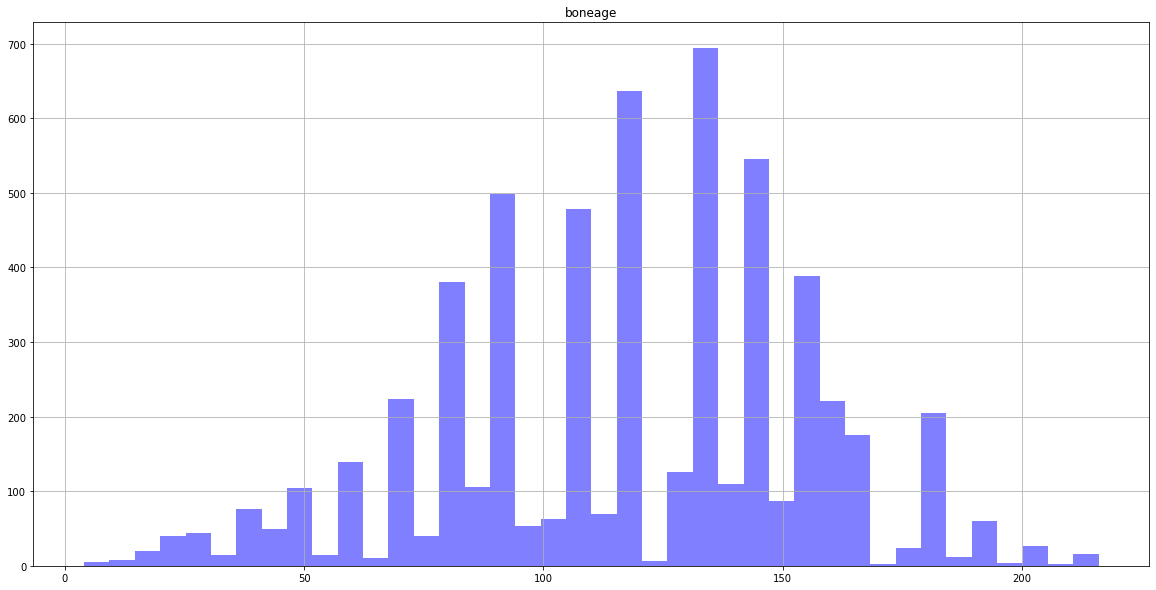

In [4]:
df_train_femele.hist(column = 'boneage', bins = 40, color = 'blue', alpha = 0.5, figsize=(20, 10))
plt.show()

In [5]:
first_female_group = df_train_femele.query('boneage < 50')
print('Less than 50 months: ', len(first_female_group))

second_female_group = df_train_femele.query('boneage >= 50 and boneage < 100')
print('Between 50 and 100 months: ', len(second_female_group))

third_female_group = df_train_femele.query('boneage >= 100 and boneage < 150')
print('Between 100 and 150 months: ', len(third_female_group))

fourth_female_group = df_train_femele.query('boneage >= 150 and boneage < 200')
print('Between 150 and 200 months: ', len(fourth_female_group))

fifth_female_group = df_train_femele.query('boneage >= 200')
print('More than 200 months: ', len(fifth_female_group))

Less than 50 months:  265
Between 50 and 100 months:  1561
Between 100 and 150 months:  2729
Between 150 and 200 months:  1178
More than 200 months:  45


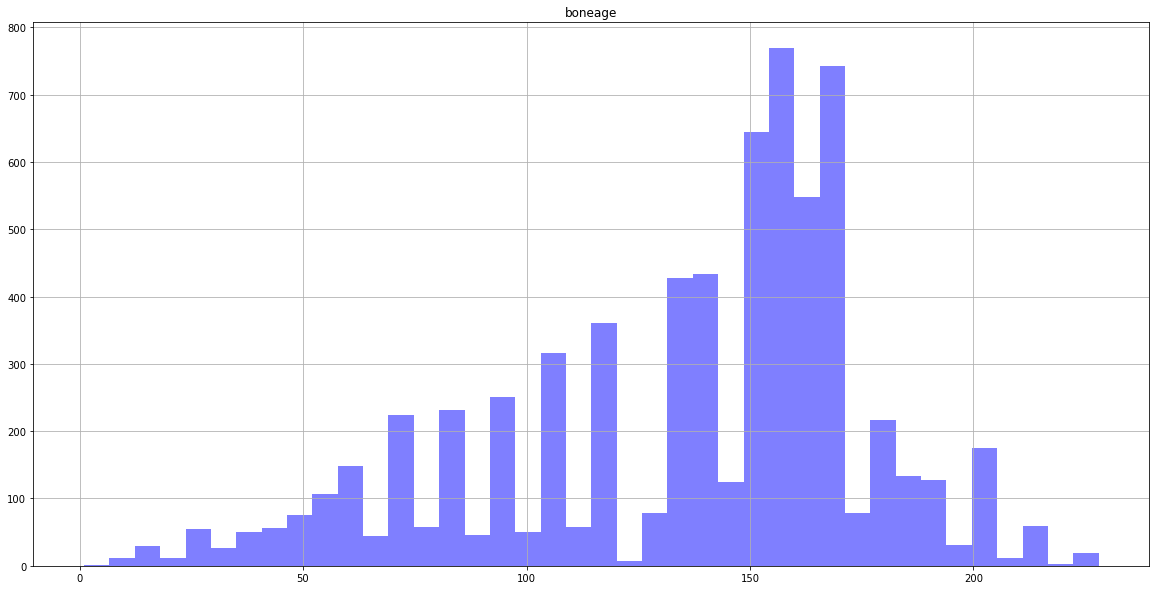

In [6]:
df_train_male = df_train.query('patientSex == "M"')
df_train_male.hist(column = 'boneage', bins = 40, color = 'blue', alpha = 0.5, figsize=(20, 10))
plt.show()

In [7]:
first_male_group = df_train_male.query('boneage < 50')
print('Less than 50 months: ', len(first_male_group))

second_male_group = df_train_male.query('boneage >= 50 and boneage < 100')
print('Between 50 and 100 months: ', len(second_male_group))

third_male_group = df_train_male.query('boneage >= 100 and boneage < 150')
print('Between 100 and 150 months: ', len(third_male_group))

fourth_male_group = df_train_male.query('boneage >= 150 and boneage < 200')
print('Between 150 and 200 months: ', len(fourth_male_group))

fifth_male_group = df_train_male.query('boneage >= 200')
print('More than 200 months: ', len(fifth_male_group))

Less than 50 months:  304
Between 50 and 100 months:  1120
Between 100 and 150 months:  1855
Between 150 and 200 months:  3288
More than 200 months:  266


## Prepare images

First, let's clean the dataset images to extract realy Hand X-Ray images, without for example black boards around and things possible to disturb the neural network learning.

In [8]:
import cv2
import numpy as np
import os

In [9]:
def normalize_images(path):
    df = pd.read_csv(f'/kaggle/input/i2a2-bone-age-regression/{path}.csv')

    for filename in df['fileName']:
       _clean_image(filename)

In [10]:
def _clean_image(filename):
    image = cv2.imread(f"/kaggle/input/i2a2-bone-age-regression/images/{filename}")
    contours = _get_contours(image)
    
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (0, 255, 0), 2)
    (x, y, _) = np.where(mask == 255)
 
    if len(x) > 0 and len(y) > 0:
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))

        image = image[topx:bottomx+1, topy:bottomy+1]
        print('contours', len(contours))

        height, width, _ = image.shape
        print('width', width)

        if width > 800:
            width_cutoff = width // 2
            image = image[:, width_cutoff:]

    if not os.path.exists(f'/kaggle/output/kaggle/working/clean-images'):
      os.makedirs(f'/kaggle/output/kaggle/working/clean-images')

    cv2.imwrite(f"/kaggle/output/kaggle/working/clean-images/{filename}", image)

In [11]:
def _get_contours(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image_edges = cv2.Canny(image_gray, 40, 180)

    contours, hierarchy = cv2.findContours(image_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    return contours

Clean images in train dataset.

In [12]:
normalize_images('train')

contours 236
width 762
contours 30
width 762
contours 12
width 762
contours 49
width 673
contours 12
width 762
contours 29
width 762
contours 6
width 762
contours 5
width 762
contours 27
width 513
contours 31
width 762
contours 67
width 762
contours 59
width 736
contours 4
width 816
contours 57
width 816
contours 14
width 762
contours 32
width 762
contours 25
width 762
contours 5
width 762
contours 36
width 762
contours 24
width 400
contours 59
width 762
contours 10
width 762
contours 7
width 762
contours 12
width 762
contours 39
width 762
contours 70
width 762
contours 14
width 762
contours 4
width 762
contours 7
width 762
contours 53
width 762
contours 11
width 762
contours 4
width 762
contours 11
width 762
contours 14
width 762
contours 53
width 715
contours 18
width 1024
contours 4
width 762
contours 14
width 762
contours 7
width 762
contours 61
width 762
contours 4
width 762
contours 10
width 762
contours 5
width 762
contours 12
width 762
contours 14
width 762
contours 14
width 76

contours 27
width 715
contours 7
width 816
contours 12
width 762
contours 9
width 816
contours 23
width 726
contours 15
width 604
contours 15
width 567
contours 27
width 650
contours 10
width 816
contours 11
width 762
contours 16
width 762
contours 19
width 816
contours 18
width 540
contours 11
width 816
contours 9
width 816
contours 15
width 1024
contours 8
width 816
contours 17
width 662
contours 9
width 762
contours 37
width 816
contours 32
width 645
contours 84
width 762
contours 19
width 329
contours 63
width 543
contours 19
width 175
contours 15
width 762
contours 10
width 816
contours 17
width 316
contours 42
width 530
contours 7
width 762
contours 9
width 533
contours 16
width 124
contours 16
width 762
contours 34
width 753
contours 17
width 762
contours 10
width 816
contours 25
width 816
contours 10
width 816
contours 14
width 762
contours 47
width 519
contours 4
width 762
contours 15
width 762
contours 11
width 762
contours 21
width 577
contours 18
width 406
contours 18
width

contours 23
width 708
contours 37
width 775
contours 28
width 739
contours 51
width 265
contours 48
width 734
contours 30
width 611
contours 20
width 599
contours 35
width 709
contours 28
width 852
contours 41
width 770
contours 45
width 576
contours 32
width 555
contours 26
width 808
contours 17
width 664
contours 18
width 925
contours 28
width 729
contours 31
width 729
contours 39
width 787
contours 24
width 740
contours 48
width 847
contours 19
width 704
contours 29
width 643
contours 18
width 399
contours 22
width 590
contours 18
width 673
contours 15
width 892
contours 35
width 792
contours 32
width 723
contours 22
width 501
contours 25
width 737
contours 43
width 766
contours 49
width 758
contours 25
width 775
contours 24
width 722
contours 49
width 1024
contours 25
width 393
contours 44
width 535
contours 23
width 658
contours 34
width 683
contours 20
width 632
contours 36
width 689
contours 5
width 499
contours 18
width 735
contours 14
width 928
contours 14
width 789
contours 5

contours 20
width 757
contours 13
width 640
contours 20
width 772
contours 143
width 852
contours 17
width 841
contours 14
width 853
contours 14
width 792
contours 270
width 816
contours 22
width 827
contours 47
width 941
contours 113
width 852
contours 44
width 667
contours 33
width 527
contours 31
width 826
contours 3
width 313
contours 386
width 818
contours 26
width 778
contours 29
width 833
contours 34
width 647
contours 7
width 617
contours 25
width 774
contours 18
width 791
contours 35
width 682
contours 32
width 695
contours 435
width 852
contours 632
width 818
contours 40
width 860
contours 53
width 533
contours 44
width 754
contours 14
width 862
contours 25
width 716
contours 25
width 715
contours 32
width 754
contours 17
width 652
contours 57
width 484
contours 62
width 616
contours 45
width 604
contours 14
width 805
contours 17
width 880
contours 243
width 852
contours 24
width 765
contours 24
width 761
contours 59
width 725
contours 21
width 772
contours 58
width 797
conto

contours 23
width 477
contours 402
width 818
contours 15
width 750
contours 19
width 842
contours 4
width 782
contours 24
width 661
contours 69
width 744
contours 20
width 723
contours 17
width 653
contours 28
width 608
contours 23
width 646
contours 45
width 855
contours 24
width 773
contours 25
width 804
contours 79
width 922
contours 20
width 654
contours 38
width 640
contours 5
width 627
contours 31
width 914
contours 40
width 794
contours 18
width 546
contours 28
width 679
contours 9
width 581
contours 33
width 729
contours 29
width 807
contours 3
width 651
contours 21
width 846
contours 4
width 831
contours 42
width 584
contours 23
width 912
contours 7
width 540
contours 25
width 838
contours 5
width 568
contours 20
width 782
contours 15
width 774
contours 26
width 606
contours 29
width 787
contours 45
width 669
contours 32
width 668
contours 33
width 709
contours 84
width 655
contours 26
width 601
contours 4
width 825
contours 25
width 682
contours 21
width 818
contours 24
width

contours 5
width 619
contours 30
width 788
contours 4
width 627
contours 16
width 910
contours 25
width 816
contours 21
width 680
contours 9
width 199
contours 26
width 744
contours 45
width 739
contours 54
width 749
contours 23
width 192
contours 28
width 532
contours 31
width 585
contours 20
width 781
contours 17
width 823
contours 53
width 804
contours 6
width 512
contours 25
width 816
contours 17
width 112
contours 6
width 570
contours 6
width 596
contours 30
width 816
contours 4
width 518
contours 16
width 647
contours 24
width 762
contours 7
width 325
contours 15
width 816
contours 27
width 741
contours 30
width 884
contours 12
width 736
contours 17
width 590
contours 40
width 661
contours 27
width 438
contours 52
width 788
contours 10
width 554
contours 10
width 601
contours 21
width 631
contours 26
width 855
contours 21
width 533
contours 54
width 601
contours 13
width 762
contours 8
width 45
contours 51
width 664
contours 40
width 826
contours 28
width 633
contours 26
width 10

contours 32
width 641
contours 31
width 816
contours 18
width 659
contours 4
width 612
contours 8
width 48
contours 22
width 778
contours 21
width 576
contours 15
width 412
contours 34
width 500
contours 34
width 783
contours 14
width 815
contours 31
width 754
contours 23
width 669
contours 29
width 771
contours 16
width 622
contours 45
width 693
contours 36
width 678
contours 24
width 652
contours 45
width 607
contours 45
width 705
contours 11
width 466
contours 15
width 505
contours 15
width 632
contours 53
width 772
contours 23
width 858
contours 24
width 499
contours 21
width 598
contours 16
width 320
contours 55
width 679
contours 36
width 639
contours 30
width 829
contours 26
width 579
contours 41
width 667
contours 18
width 644
contours 18
width 550
contours 22
width 815
contours 36
width 710
contours 11
width 815
contours 38
width 684
contours 18
width 721
contours 19
width 451
contours 16
width 696
contours 25
width 648
contours 65
width 607
contours 24
width 608
contours 30
w

contours 23
width 757
contours 16
width 762
contours 27
width 879
contours 33
width 630
contours 19
width 790
contours 28
width 683
contours 24
width 585
contours 13
width 518
contours 57
width 640
contours 478
width 816
contours 21
width 674
contours 23
width 625
contours 50
width 731
contours 18
width 560
contours 16
width 872
contours 39
width 825
contours 41
width 657
contours 14
width 649
contours 22
width 674
contours 23
width 746
contours 33
width 753
contours 39
width 645
contours 15
width 592
contours 347
width 816
contours 13
width 688
contours 14
width 701
contours 36
width 647
contours 22
width 689
contours 10
width 728
contours 28
width 724
contours 34
width 672
contours 33
width 664
contours 12
width 772
contours 15
width 618
contours 30
width 692
contours 23
width 708
contours 25
width 677
contours 42
width 829
contours 15
width 492
contours 50
width 663
contours 26
width 693
contours 39
width 670
contours 12
width 688
contours 40
width 723
contours 41
width 835
contours

contours 805
width 688
contours 123
width 814
contours 132
width 842
contours 31
width 626
contours 93
width 656
contours 78
width 678
contours 124
width 731
contours 87
width 653
contours 86
width 800
contours 67
width 737
contours 76
width 904
contours 139
width 598
contours 81
width 702
contours 121
width 656
contours 68
width 754
contours 175
width 713
contours 83
width 897
contours 81
width 848
contours 116
width 594
contours 220
width 653
contours 75
width 692
contours 64
width 588
contours 119
width 823
contours 107
width 671
contours 240
width 734
contours 231
width 769
contours 9
width 524
contours 351
width 750
contours 151
width 977
contours 120
width 885
contours 113
width 956
contours 103
width 1024
contours 136
width 820
contours 43
width 791
contours 195
width 774
contours 209
width 737
contours 115
width 638
contours 359
width 688
contours 192
width 604
contours 269
width 599
contours 356
width 555
contours 211
width 628
contours 101
width 680
contours 457
width 640
con

contours 456
width 641
contours 119
width 792
contours 77
width 702
contours 64
width 783
contours 497
width 853
contours 88
width 605
contours 70
width 875
contours 136
width 576
contours 190
width 770
contours 130
width 630
contours 124
width 636
contours 114
width 900
contours 277
width 736
contours 76
width 825
contours 97
width 676
contours 79
width 693
contours 165
width 868
contours 211
width 595
contours 8
width 491
contours 89
width 839
contours 71
width 604
contours 331
width 667
contours 45
width 763
contours 60
width 732
contours 118
width 626
contours 187
width 430
contours 77
width 882
contours 26
width 847
contours 122
width 820
contours 115
width 917
contours 242
width 780
contours 339
width 858
contours 182
width 823
contours 62
width 959
contours 240
width 841
contours 132
width 647
contours 436
width 875
contours 158
width 698
contours 54
width 751
contours 109
width 596
contours 76
width 772
contours 158
width 876
contours 117
width 768
contours 156
width 748
contou

contours 579
width 755
contours 57
width 643
contours 451
width 980
contours 281
width 663
contours 178
width 808
contours 92
width 637
contours 131
width 602
contours 140
width 785
contours 70
width 541
contours 256
width 751
contours 526
width 861
contours 228
width 941
contours 99
width 710
contours 204
width 741
contours 47
width 640
contours 15
width 82
contours 129
width 839
contours 67
width 707
contours 177
width 1024
contours 128
width 777
contours 73
width 974
contours 165
width 791
contours 128
width 715
contours 118
width 691
contours 202
width 719
contours 118
width 761
contours 530
width 874
contours 105
width 767
contours 141
width 779
contours 165
width 724
contours 222
width 725
contours 148
width 668
contours 475
width 860
contours 166
width 920
contours 43
width 894
contours 180
width 987
contours 123
width 720
contours 116
width 702
contours 361
width 840
contours 341
width 800
contours 112
width 644
contours 239
width 617
contours 76
width 806
contours 229
width 75

contours 385
width 728
contours 221
width 678
contours 36
width 730
contours 291
width 1024
contours 129
width 795
contours 134
width 798
contours 165
width 687
contours 389
width 979
contours 747
width 738
contours 405
width 734
contours 200
width 728
contours 37
width 786
contours 238
width 947
contours 81
width 674
contours 194
width 732
contours 94
width 772
contours 414
width 859
contours 336
width 780
contours 157
width 771
contours 124
width 771
contours 65
width 724
contours 59
width 654
contours 230
width 776
contours 165
width 664
contours 78
width 692
contours 146
width 754
contours 123
width 866
contours 141
width 699
contours 223
width 562
contours 115
width 629
contours 254
width 629
contours 195
width 1024
contours 413
width 833
contours 52
width 707
contours 119
width 716
contours 111
width 654
contours 346
width 890
contours 219
width 888
contours 161
width 774
contours 166
width 806
contours 651
width 871
contours 506
width 806
contours 175
width 838
contours 137
widt

contours 107
width 585
contours 38
width 576
contours 68
width 821
contours 115
width 757
contours 168
width 715
contours 227
width 718
contours 213
width 737
contours 30
width 852
contours 285
width 650
contours 255
width 766
contours 213
width 660
contours 137
width 609
contours 26
width 1024
contours 620
width 770
contours 43
width 762
contours 221
width 777
contours 119
width 668
contours 357
width 730
contours 94
width 927
contours 217
width 717
contours 189
width 671
contours 122
width 943
contours 286
width 651
contours 108
width 883
contours 42
width 660
contours 137
width 659
contours 69
width 581
contours 57
width 746
contours 102
width 756
contours 292
width 674
contours 161
width 626
contours 546
width 568
contours 71
width 662
contours 117
width 706
contours 170
width 641
contours 147
width 801
contours 142
width 568
contours 190
width 762
contours 68
width 711
contours 10
width 77
contours 277
width 891
contours 131
width 902
contours 90
width 691
contours 128
width 821
c

contours 482
width 857
contours 569
width 927
contours 35
width 464
contours 116
width 859
contours 306
width 636
contours 132
width 727
contours 896
width 1024
contours 256
width 788
contours 104
width 734
contours 138
width 785
contours 118
width 774
contours 60
width 979
contours 77
width 714
contours 67
width 633
contours 82
width 751
contours 406
width 754
contours 336
width 778
contours 71
width 832
contours 121
width 793
contours 695
width 878
contours 48
width 800
contours 148
width 713
contours 298
width 711
contours 148
width 831
contours 219
width 749
contours 145
width 770
contours 134
width 857
contours 235
width 975
contours 171
width 859
contours 218
width 802
contours 193
width 655
contours 136
width 980
contours 100
width 1024
contours 420
width 661
contours 267
width 696
contours 36
width 762
contours 396
width 876
contours 181
width 739
contours 125
width 1024
contours 126
width 667
contours 85
width 680
contours 121
width 727
contours 369
width 663
contours 526
widt

contours 85
width 565
contours 97
width 543
contours 80
width 732
contours 97
width 926
contours 74
width 663
contours 494
width 651
contours 122
width 671
contours 62
width 674
contours 143
width 798
contours 120
width 763
contours 127
width 672
contours 139
width 737
contours 57
width 956
contours 76
width 1024
contours 96
width 703
contours 38
width 857
contours 15
width 560
contours 188
width 724
contours 351
width 862
contours 283
width 939
contours 63
width 708
contours 103
width 1006
contours 342
width 913
contours 132
width 871
contours 55
width 713
contours 88
width 1024
contours 672
width 852
contours 50
width 732
contours 261
width 780
contours 42
width 755
contours 784
width 851
contours 96
width 788
contours 241
width 859
contours 501
width 731
contours 207
width 703
contours 214
width 875
contours 91
width 748
contours 90
width 820
contours 66
width 639
contours 81
width 691
contours 139
width 996
contours 198
width 766
contours 211
width 897
contours 18
width 573
contour

contours 119
width 772
contours 187
width 589
contours 142
width 677
contours 90
width 492
contours 70
width 670
contours 161
width 734
contours 128
width 805
contours 126
width 899
contours 94
width 808
contours 130
width 772
contours 138
width 800
contours 159
width 643
contours 77
width 790
contours 200
width 811
contours 134
width 752
contours 175
width 806
contours 369
width 821
contours 68
width 766
contours 128
width 827
contours 128
width 800
contours 94
width 883
contours 108
width 531
contours 126
width 872
contours 637
width 912
contours 139
width 756
contours 75
width 676
contours 305
width 879
contours 335
width 888
contours 127
width 784
contours 68
width 842
contours 72
width 710
contours 38
width 729
contours 187
width 680
contours 158
width 864
contours 21
width 734
contours 154
width 686
contours 230
width 680
contours 108
width 746
contours 44
width 628
contours 201
width 724
contours 68
width 679
contours 188
width 1024
contours 67
width 656
contours 338
width 705
c

contours 105
width 792
contours 185
width 745
contours 187
width 655
contours 362
width 767
contours 90
width 736
contours 400
width 831
contours 509
width 657
contours 102
width 587
contours 115
width 775
contours 48
width 672
contours 216
width 781
contours 79
width 532
contours 60
width 695
contours 612
width 810
contours 179
width 773
contours 142
width 790
contours 151
width 785
contours 30
width 594
contours 100
width 630
contours 64
width 998
contours 191
width 492
contours 64
width 651
contours 513
width 795
contours 81
width 897
contours 83
width 781
contours 96
width 644
contours 89
width 710
contours 140
width 774
contours 72
width 733
contours 272
width 544
contours 170
width 674
contours 89
width 628
contours 254
width 717
contours 246
width 643
contours 173
width 696
contours 74
width 813
contours 165
width 828
contours 243
width 856
contours 143
width 813
contours 336
width 671
contours 85
width 811
contours 192
width 625
contours 101
width 606
contours 457
width 888
con

contours 76
width 735
contours 78
width 647
contours 46
width 734
contours 188
width 741
contours 213
width 778
contours 64
width 789
contours 159
width 815
contours 151
width 626
contours 147
width 761
contours 116
width 648
contours 167
width 632
contours 116
width 1024
contours 88
width 794
contours 123
width 662
contours 71
width 716
contours 167
width 767
contours 96
width 903
contours 137
width 791
contours 116
width 654
contours 190
width 566
contours 435
width 743
contours 160
width 846
contours 115
width 846
contours 85
width 817
contours 93
width 834
contours 85
width 592
contours 121
width 910
contours 103
width 781
contours 135
width 638
contours 48
width 732
contours 96
width 710
contours 51
width 831
contours 41
width 668
contours 45
width 680
contours 98
width 739
contours 494
width 828
contours 90
width 922
contours 188
width 725
contours 186
width 803
contours 121
width 633
contours 84
width 725
contours 304
width 834
contours 119
width 594
contours 129
width 650
conto

contours 42
width 738
contours 174
width 608
contours 194
width 774
contours 178
width 656
contours 239
width 993
contours 148
width 563
contours 348
width 817
contours 132
width 546
contours 98
width 601
contours 210
width 667
contours 186
width 626
contours 209
width 668
contours 475
width 704
contours 58
width 772
contours 82
width 722
contours 231
width 773
contours 185
width 904
contours 145
width 1024
contours 143
width 888
contours 66
width 629
contours 176
width 635
contours 156
width 604
contours 139
width 722
contours 130
width 747
contours 405
width 696
contours 180
width 716
contours 124
width 645
contours 79
width 741
contours 70
width 902
contours 62
width 739
contours 133
width 903
contours 88
width 704
contours 114
width 794
contours 102
width 801
contours 427
width 934
contours 667
width 938
contours 140
width 694
contours 98
width 780
contours 136
width 881
contours 130
width 667
contours 199
width 679
contours 95
width 602
contours 291
width 767
contours 124
width 73

contours 412
width 915
contours 258
width 829
contours 75
width 676
contours 97
width 836
contours 49
width 762
contours 144
width 675
contours 107
width 567
contours 79
width 637
contours 170
width 600
contours 131
width 525
contours 111
width 643
contours 80
width 608
contours 136
width 705
contours 190
width 560
contours 152
width 873
contours 63
width 800
contours 102
width 925
contours 99
width 791
contours 101
width 751
contours 206
width 685
contours 187
width 927
contours 133
width 886
contours 130
width 613
contours 117
width 772
contours 238
width 748
contours 87
width 827
contours 103
width 878
contours 183
width 689
contours 47
width 983
contours 242
width 745
contours 181
width 953
contours 168
width 783
contours 157
width 653
contours 108
width 640
contours 722
width 788
contours 100
width 671
contours 430
width 782
contours 405
width 808
contours 122
width 597
contours 216
width 727
contours 106
width 620
contours 136
width 796
contours 100
width 823
contours 71
width 64

contours 147
width 718
contours 49
width 670
contours 112
width 759
contours 50
width 734
contours 186
width 621
contours 69
width 735
contours 247
width 774
contours 132
width 685
contours 216
width 576
contours 188
width 703
contours 211
width 791
contours 121
width 728
contours 91
width 584
contours 236
width 657
contours 80
width 898
contours 144
width 705
contours 301
width 800
contours 291
width 709
contours 101
width 737
contours 325
width 722
contours 87
width 708
contours 128
width 697
contours 416
width 625
contours 337
width 827
contours 107
width 900
contours 177
width 615
contours 344
width 842
contours 89
width 959
contours 288
width 800
contours 133
width 779
contours 67
width 643
contours 172
width 927
contours 112
width 812
contours 180
width 848
contours 28
width 879
contours 92
width 723
contours 226
width 568
contours 535
width 849
contours 106
width 720
contours 198
width 692
contours 266
width 661
contours 87
width 772
contours 100
width 730
contours 81
width 681


contours 287
width 911
contours 73
width 905
contours 159
width 676
contours 59
width 769
contours 78
width 684
contours 83
width 817
contours 49
width 696
contours 166
width 652
contours 140
width 496
contours 58
width 847
contours 144
width 911
contours 116
width 914
contours 546
width 958
contours 85
width 821
contours 123
width 808
contours 153
width 714
contours 160
width 683
contours 91
width 772
contours 139
width 763
contours 882
width 909
contours 155
width 895
contours 374
width 810
contours 84
width 796
contours 163
width 594
contours 175
width 859
contours 243
width 692
contours 114
width 798
contours 217
width 795
contours 493
width 842
contours 142
width 1024
contours 47
width 685
contours 65
width 695
contours 166
width 674
contours 102
width 827
contours 113
width 745
contours 117
width 627
contours 206
width 583
contours 146
width 649
contours 46
width 743
contours 151
width 985
contours 95
width 862
contours 153
width 672
contours 200
width 870
contours 532
width 859


contours 150
width 595
contours 418
width 930
contours 90
width 741
contours 149
width 839
contours 209
width 728
contours 130
width 699
contours 237
width 881
contours 97
width 679
contours 314
width 694
contours 244
width 711
contours 283
width 789
contours 634
width 763
contours 116
width 913
contours 137
width 628
contours 86
width 832
contours 123
width 591
contours 65
width 860
contours 42
width 747
contours 90
width 666
contours 131
width 840
contours 69
width 825
contours 124
width 818
contours 394
width 911
contours 125
width 629
contours 174
width 745
contours 96
width 653
contours 85
width 857
contours 76
width 728
contours 321
width 637
contours 206
width 469
contours 771
width 905
contours 289
width 810
contours 104
width 1006
contours 237
width 607
contours 300
width 695
contours 127
width 744
contours 42
width 888
contours 84
width 784
contours 90
width 663
contours 57
width 615
contours 59
width 700
contours 10
width 109
contours 344
width 852
contours 110
width 1024
co

contours 235
width 888
contours 99
width 992
contours 128
width 586
contours 282
width 609
contours 74
width 708
contours 88
width 664
contours 141
width 751
contours 106
width 601
contours 161
width 935
contours 128
width 782
contours 55
width 772
contours 74
width 553
contours 142
width 754
contours 353
width 1009
contours 85
width 844
contours 234
width 971
contours 194
width 577
contours 153
width 652
contours 121
width 778
contours 228
width 388
contours 117
width 747
contours 124
width 662
contours 176
width 789
contours 270
width 803
contours 244
width 741
contours 226
width 498
contours 291
width 731
contours 156
width 803
contours 116
width 736
contours 84
width 834
contours 177
width 795
contours 233
width 850
contours 59
width 795
contours 215
width 804
contours 85
width 790
contours 177
width 758
contours 150
width 838
contours 425
width 879
contours 139
width 906
contours 20
width 664
contours 718
width 996
contours 68
width 710
contours 100
width 566
contours 93
width 755

contours 149
width 972
contours 121
width 815
contours 48
width 592
contours 64
width 825
contours 221
width 720
contours 146
width 628
contours 66
width 655
contours 141
width 747
contours 506
width 780
contours 382
width 701
contours 104
width 525
contours 193
width 786
contours 77
width 669
contours 58
width 593
contours 160
width 837
contours 689
width 1024
contours 73
width 910
contours 44
width 763
contours 117
width 738
contours 170
width 815
contours 170
width 780
contours 183
width 475
contours 565
width 756
contours 152
width 787
contours 300
width 655
contours 105
width 710
contours 138
width 602
contours 174
width 891
contours 139
width 984
contours 160
width 827
contours 277
width 792
contours 110
width 815
contours 153
width 562
contours 198
width 772
contours 147
width 760
contours 255
width 672
contours 111
width 762
contours 229
width 729
contours 52
width 873
contours 225
width 896
contours 209
width 632
contours 125
width 652
contours 198
width 925
contours 146
width

contours 148
width 789
contours 35
width 721
contours 312
width 599
contours 147
width 806
contours 164
width 877
contours 189
width 636
contours 146
width 899
contours 232
width 672
contours 123
width 639
contours 52
width 912
contours 538
width 750
contours 206
width 826
contours 183
width 881
contours 138
width 682
contours 15
width 654
contours 147
width 1024
contours 165
width 631
contours 108
width 734
contours 98
width 811
contours 42
width 631
contours 144
width 773
contours 66
width 765
contours 202
width 751
contours 107
width 865
contours 104
width 720
contours 135
width 809
contours 216
width 835
contours 36
width 822
contours 95
width 672
contours 132
width 787
contours 98
width 654
contours 95
width 651
contours 45
width 711
contours 110
width 791
contours 132
width 675
contours 159
width 817
contours 123
width 689
contours 31
width 616
contours 420
width 872
contours 82
width 864
contours 58
width 727
contours 105
width 572
contours 83
width 901
contours 473
width 687
co

contours 65
width 906
contours 88
width 445
contours 75
width 622
contours 332
width 913
contours 162
width 733
contours 328
width 714
contours 56
width 825
contours 110
width 898
contours 97
width 692
contours 92
width 483
contours 233
width 984
contours 108
width 773
contours 86
width 594
contours 137
width 959
contours 186
width 732
contours 196
width 533
contours 465
width 825
contours 148
width 825
contours 226
width 924
contours 176
width 823
contours 244
width 709
contours 126
width 739
contours 106
width 729
contours 233
width 854
contours 103
width 671
contours 126
width 821
contours 616
width 919
contours 130
width 532
contours 90
width 781
contours 97
width 752
contours 114
width 906
contours 47
width 667
contours 266
width 1024
contours 164
width 908
contours 53
width 772
contours 114
width 920
contours 135
width 851
contours 106
width 783
contours 148
width 681
contours 311
width 974
contours 103
width 922
contours 170
width 614
contours 89
width 1024
contours 73
width 649

contours 488
width 943
contours 110
width 756
contours 449
width 742
contours 204
width 701
contours 118
width 1024
contours 355
width 691
contours 410
width 667
contours 140
width 806
contours 101
width 703
contours 356
width 759
contours 138
width 546
contours 57
width 688
contours 100
width 653
contours 131
width 530
contours 174
width 802
contours 191
width 581
contours 113
width 690
contours 124
width 818
contours 226
width 804
contours 58
width 626
contours 46
width 743
contours 134
width 861
contours 120
width 808
contours 120
width 1011
contours 556
width 811
contours 89
width 825
contours 267
width 836
contours 143
width 669
contours 153
width 562
contours 157
width 929
contours 101
width 1003
contours 125
width 656
contours 9
width 82
contours 427
width 965
contours 164
width 921
contours 191
width 647
contours 307
width 782
contours 118
width 834
contours 120
width 642
contours 161
width 743
contours 73
width 761
contours 251
width 861
contours 323
width 826
contours 50
widt

contours 33
width 700
contours 180
width 793
contours 154
width 773
contours 175
width 772
contours 186
width 680
contours 214
width 778
contours 197
width 905
contours 167
width 821
contours 74
width 707
contours 129
width 740
contours 53
width 784
contours 94
width 829
contours 358
width 718
contours 280
width 930
contours 92
width 723
contours 114
width 797
contours 151
width 927
contours 385
width 808
contours 146
width 859
contours 224
width 752
contours 73
width 829
contours 84
width 588
contours 311
width 869
contours 118
width 959
contours 110
width 541
contours 120
width 752
contours 107
width 996
contours 215
width 745
contours 149
width 817
contours 379
width 929
contours 617
width 769
contours 105
width 772
contours 186
width 639
contours 142
width 760
contours 57
width 813
contours 244
width 803
contours 83
width 507
contours 79
width 840
contours 217
width 555
contours 110
width 514
contours 74
width 697
contours 335
width 847
contours 81
width 761
contours 162
width 767


contours 147
width 693
contours 125
width 906
contours 302
width 982
contours 84
width 763
contours 119
width 674
contours 305
width 778
contours 243
width 734
contours 675
width 899
contours 127
width 446
contours 76
width 935
contours 81
width 993
contours 140
width 745
contours 239
width 726
contours 430
width 854
contours 78
width 750
contours 49
width 853
contours 46
width 772
contours 154
width 625
contours 77
width 724
contours 60
width 865
contours 108
width 759
contours 201
width 649
contours 104
width 957
contours 538
width 773
contours 124
width 634
contours 153
width 718
contours 44
width 879
contours 223
width 582
contours 252
width 625
contours 181
width 805
contours 261
width 811
contours 250
width 539
contours 113
width 637
contours 180
width 762
contours 116
width 835
contours 133
width 657
contours 93
width 814
contours 105
width 756
contours 108
width 626
contours 322
width 680
contours 149
width 855
contours 89
width 870
contours 140
width 935
contours 98
width 834


contours 126
width 821
contours 217
width 652
contours 192
width 585
contours 230
width 613
contours 79
width 566
contours 428
width 799
contours 392
width 1024
contours 32
width 681
contours 57
width 742
contours 281
width 743
contours 172
width 801
contours 192
width 792
contours 176
width 663
contours 220
width 709
contours 154
width 716
contours 70
width 610
contours 46
width 834
contours 7
width 315
contours 33
width 729
contours 519
width 931
contours 135
width 690
contours 62
width 771
contours 111
width 716
contours 122
width 694
contours 144
width 783
contours 195
width 758
contours 80
width 659
contours 70
width 798
contours 207
width 625
contours 241
width 878
contours 101
width 938
contours 162
width 793
contours 189
width 653
contours 267
width 672
contours 370
width 617
contours 165
width 936
contours 69
width 790
contours 286
width 581
contours 49
width 676
contours 104
width 584
contours 45
width 842
contours 45
width 760
contours 137
width 805
contours 110
width 751
co

contours 122
width 873
contours 68
width 595
contours 189
width 831
contours 158
width 844
contours 91
width 639
contours 114
width 728
contours 66
width 703
contours 129
width 749
contours 299
width 852
contours 139
width 711
contours 194
width 741
contours 378
width 827
contours 82
width 668
contours 228
width 864
contours 46
width 902
contours 192
width 850
contours 129
width 857
contours 44
width 608
contours 136
width 651
contours 73
width 564
contours 161
width 1024
contours 455
width 934
contours 391
width 790
contours 179
width 1024
contours 139
width 810
contours 72
width 770
contours 296
width 651
contours 235
width 795
contours 347
width 826
contours 66
width 760
contours 83
width 616
contours 118
width 775
contours 324
width 645
contours 156
width 814
contours 91
width 624
contours 64
width 764
contours 140
width 763
contours 107
width 748
contours 136
width 848
contours 390
width 768
contours 172
width 927
contours 49
width 761
contours 97
width 693
contours 257
width 782


contours 83
width 684
contours 116
width 842
contours 536
width 935
contours 81
width 771
contours 158
width 891
contours 114
width 766
contours 80
width 585
contours 176
width 708
contours 86
width 738
contours 106
width 693
contours 107
width 761
contours 658
width 903
contours 133
width 853
contours 74
width 684
contours 65
width 742
contours 79
width 676
contours 475
width 848
contours 899
width 960
contours 92
width 848
contours 155
width 732
contours 176
width 784
contours 96
width 862
contours 279
width 843
contours 125
width 773
contours 83
width 790
contours 216
width 619
contours 61
width 636
contours 137
width 603
contours 120
width 820
contours 116
width 775
contours 177
width 945
contours 349
width 687
contours 129
width 950
contours 131
width 690
contours 329
width 717
contours 396
width 805
contours 69
width 885
contours 110
width 689
contours 180
width 711
contours 189
width 841
contours 172
width 813
contours 62
width 906
contours 91
width 796
contours 215
width 704
co

contours 116
width 778
contours 313
width 947
contours 304
width 729
contours 210
width 846
contours 231
width 1024
contours 160
width 911
contours 216
width 617
contours 391
width 761
contours 155
width 662
contours 212
width 720
contours 22
width 1024
contours 310
width 877
contours 92
width 604
contours 202
width 767
contours 122
width 882
contours 385
width 794
contours 275
width 701
contours 116
width 754
contours 159
width 931
contours 130
width 669
contours 616
width 1019
contours 378
width 822
contours 69
width 770
contours 164
width 840
contours 253
width 626
contours 124
width 697
contours 55
width 732
contours 116
width 700
contours 124
width 760
contours 159
width 527
contours 83
width 661
contours 80
width 816
contours 84
width 598
contours 109
width 1024
contours 98
width 857
contours 116
width 792
contours 254
width 690
contours 556
width 685
contours 150
width 750
contours 230
width 636
contours 52
width 546
contours 230
width 614
contours 104
width 724
contours 144
wid

contours 106
width 770
contours 105
width 837
contours 190
width 668
contours 133
width 618
contours 213
width 767
contours 175
width 799
contours 67
width 811
contours 83
width 733
contours 80
width 781
contours 228
width 872
contours 161
width 730
contours 152
width 887
contours 233
width 747
contours 98
width 857
contours 612
width 823
contours 77
width 821
contours 110
width 645
contours 118
width 1024
contours 56
width 542
contours 216
width 836
contours 130
width 823
contours 147
width 679
contours 130
width 782
contours 126
width 609
contours 185
width 991
contours 92
width 659
contours 91
width 789
contours 134
width 820
contours 72
width 591
contours 130
width 631
contours 132
width 670
contours 170
width 709
contours 489
width 802
contours 163
width 576
contours 368
width 721
contours 287
width 697
contours 160
width 661
contours 342
width 844
contours 169
width 703
contours 272
width 713
contours 194
width 815
contours 137
width 818
contours 151
width 938
contours 141
width 

Examples images before and after.

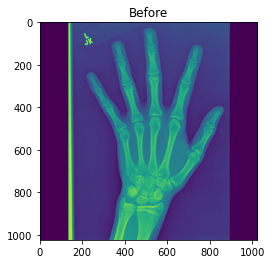

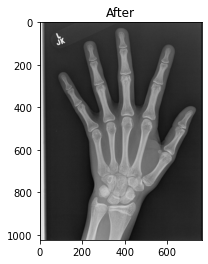

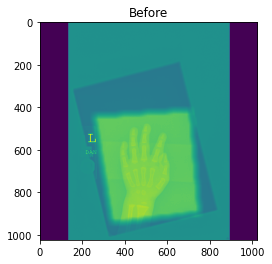

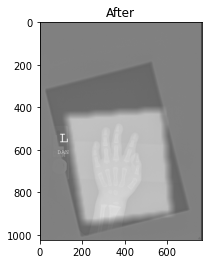

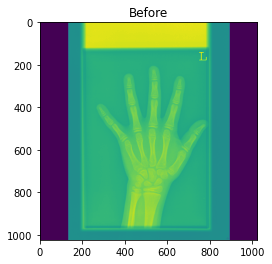

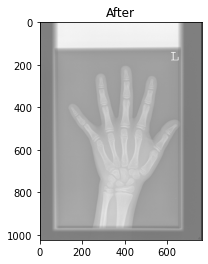

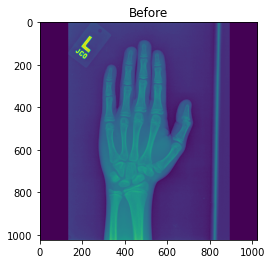

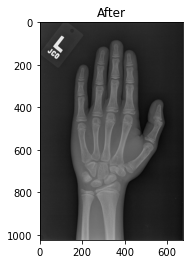

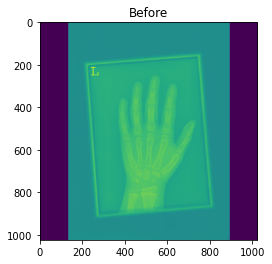

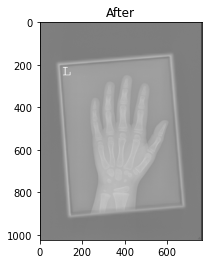

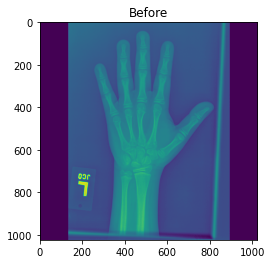

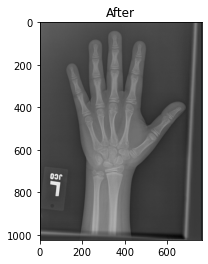

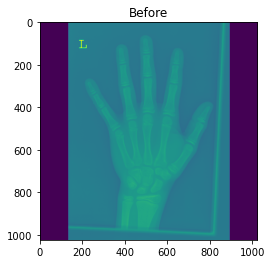

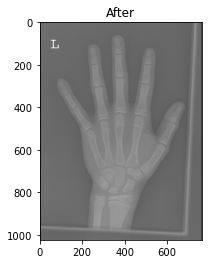

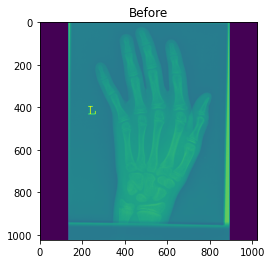

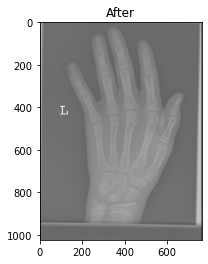

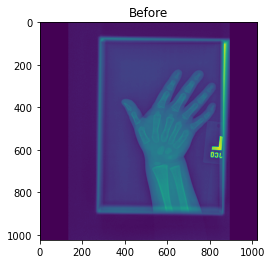

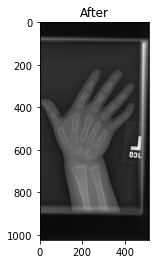

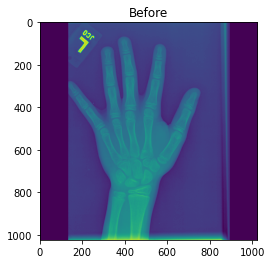

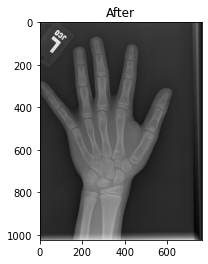

In [13]:
df = pd.read_csv(f'/kaggle/input/i2a2-bone-age-regression/train.csv')
df = df.head(10)

for filename in df['fileName']:
  plt.title('Before')
  before = mpimg.imread(f"/kaggle/input/i2a2-bone-age-regression/images/{filename}")
  imgplot = plt.imshow(before)
  plt.show()

  plt.title('After')
  after = mpimg.imread(f"/kaggle/output/kaggle/working/clean-images/{filename}")
  imgplot = plt.imshow(after)
  plt.show()

## Prepare train dataset

Like we saw before, the numbers images to ages is very differnet. So the train dataset isn't balanced enought to apply a model.

For that, we'll increase images in range with less images and use less images in age ranges where there much more than is necessary.

We'll use data augmentation to it.

In [14]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

A example to apply data augementation to generate new images from one.

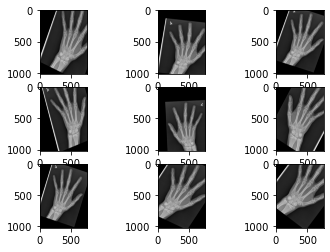

In [15]:
image = load_img("/kaggle/output/kaggle/working/clean-images/1377.png")
data = img_to_array(image)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='constant')

iterator = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = iterator.next()
    image_generated = batch[0].astype('uint8')
    plt.imshow(image_generated)
plt.show()

Now, We'll separe what data in train dataset will be incresed.

We have already seen that train datasest isn't balanced. Look again girl's data.

In `df_train_femele` we'll increase the first group, and choose ramdon 1000 elemnets each other group to create a balanced dataset with 4000 samples.

We won't use the last group because it has so small numbers of images.

In [16]:
def image_generated(filename, number_samples):
  image = load_img(f"/kaggle/output/kaggle/working/clean-images/{filename}")
  data = img_to_array(image)

  samples = expand_dims(data, 0)
  datagen = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='constant')

  iterator = datagen.flow(samples, batch_size=1)
  new_images = []
  for i in range(number_samples):
    batch = iterator.next()
    image_generated = batch[0].astype('uint8')
    new_images.append(image_generated)
  
  return new_images

In [17]:
def update_dataset(dataset, patientSex, number_samples):
  mean_bornage = dataset['boneage'].mean()

  for filename in dataset['fileName']:
    new_images = image_generated(filename, number_samples)
    for idx, image in enumerate(new_images):
      cv2.imwrite(f"/kaggle/output/kaggle/working/clean-images/{idx}-{filename}", image)

      new_data = pd.DataFrame({"fileName":[f"{idx}-{filename}"], "patientSex":[patientSex], "boneage": [mean_bornage]})
      dataset = pd.concat([dataset, new_data], ignore_index=True)
  
  return dataset

In [18]:
first_increased_female_group = update_dataset(first_female_group, 'F', 4).head(1000)
first_increased_female_group

,fileName,patientSex,boneage
0,1378.png,F,12.000000
1,1398.png,F,4.000000
2,1399.png,F,36.000000
3,1402.png,F,24.000000
4,1407.png,F,30.000000
...,...,...,...
995,2-9789.png,F,31.890566
996,3-9789.png,F,31.890566
997,0-9799.png,F,31.890566
998,1-9799.png,F,31.890566


In [19]:
second_female_group = second_female_group.sample(n=1000, random_state=1)
third_female_group = third_female_group.sample(n=1000, random_state=1)
fourth_female_group = fourth_female_group.sample(n=1000, random_state=1)

train_female_final = pd.concat([first_increased_female_group, second_female_group, third_female_group, fourth_female_group], ignore_index=True)

In [20]:
train_female_final.to_csv('/kaggle/output/kaggle/working/F-train.csv')

In [21]:
!ls -all -h /kaggle/output/kaggle/working

total 464K
drwxr-xr-x 3 root root 4.0K Jul 20 21:13 .
drwxr-xr-x 3 root root 4.0K Jul 20 20:57 ..
-rw-r--r-- 1 root root  96K Jul 20 21:13 F-train.csv
drwxr-xr-x 2 root root 360K Jul 20 21:13 clean-images


So, we'll the same to boys's data.

In this case, we'll increase the first and the last groups doing a dataset with 5000 samples, 1000 samples of each group.

In [22]:
first_increased_male_group = update_dataset(first_male_group, 'M', 4).head(1000)
first_increased_male_group

,fileName,patientSex,boneage
0,1385.png,M,36.000000
1,1422.png,M,32.000000
2,1428.png,M,33.000000
3,1440.png,M,42.000000
4,1445.png,M,21.000000
...,...,...,...
995,3-7449.png,M,33.940789
996,0-7470.png,M,33.940789
997,1-7470.png,M,33.940789
998,2-7470.png,M,33.940789


In [23]:
fifth_increased_male_group = update_dataset(fifth_male_group, 'M', 4).head(1000)
fifth_increased_male_group

,fileName,patientSex,boneage
0,1466.png,M,216.000000
1,1701.png,M,210.000000
2,1713.png,M,222.000000
3,1748.png,M,200.000000
4,1794.png,M,204.000000
...,...,...,...
995,1-10719.png,M,208.676692
996,2-10719.png,M,208.676692
997,3-10719.png,M,208.676692
998,0-10776.png,M,208.676692


In [24]:
second_male_group = second_male_group.sample(n=1000, random_state=1)
third_male_group = third_male_group.sample(n=1000, random_state=1)
fourth_male_group = fourth_male_group.sample(n=1000, random_state=1)

train_male_final = pd.concat([first_increased_male_group, second_male_group, third_male_group, fourth_male_group, fifth_increased_male_group], ignore_index=True)

In [25]:
train_male_final.to_csv('/kaggle/output/kaggle/working/M-train.csv')

In [26]:
!ls -all -h /kaggle/output/kaggle/working

total 664K
drwxr-xr-x 3 root root 4.0K Jul 20 21:18 .
drwxr-xr-x 3 root root 4.0K Jul 20 20:57 ..
-rw-r--r-- 1 root root  96K Jul 20 21:13 F-train.csv
-rw-r--r-- 1 root root 127K Jul 20 21:18 M-train.csv
drwxr-xr-x 2 root root 432K Jul 20 21:18 clean-images


## Neural network

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import tensorflow as tf

from keras.applications.resnet import ResNet50, preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint   
from keras.layers import Conv2D, Dense, Dropout, Flatten, GlobalMaxPooling2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

In [28]:
def init_model(patientSex, df):
    if not os.path.isfile(f'/kaggle/output/kaggle/working/model.hand.x-ray.weights.{patientSex}.best.hdf5'):
        images, outputs = _prepare_dataset(df)
        model, x, y = _train(patientSex, images, outputs)
        print('New train!')
    else:
        model = _create_model()
        model.load_weights(f'/kaggle/output/kaggle/working/model.hand.x-ray.weights.{patientSex}.best.hdf5')
        print('Using network trained!')

    return model

In [37]:
def _preprocess_images(filename):
    image = load_img(filename, target_size=(128, 128))
    image = img_to_array(image)
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    return preprocess_input(image) 

def _prepare_dataset(df):
    images = [_preprocess_images(f"/kaggle/output/kaggle/working/clean-images/{filename}") for filename in df['fileName']]
    images = np.array(images, dtype=np.float32)

    outputs = df['boneage']
    outputs = np.array(outputs, dtype=np.float32)

    return images, outputs

In [38]:
def _create_model():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
    
    number_of_frozen_layers = 0
    for i, layer in enumerate(base_model.layers):
      if i>=number_of_frozen_layers:
        break
      layer.trainable = False

    x = GlobalMaxPooling2D()(base_model.output)
    x = Flatten()(x)
    x = Dense(16, activation = 'relu')(x)
    x = Dense(1, activation = 'linear')(x)

    model = Model(base_model.input, x)
    model.summary()
    
    return model

In [40]:
def _train(patientSex, images, outputs):
    print('Number images:', len(images))
    print('Number outputs:', len(outputs))

    # divindo dataset de treinamento em treinamento, teste e validação
    seed = 42
    x_train, x_test, y_train, y_test = train_test_split(images, outputs, test_size = 0.20, random_state=seed)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.20, random_state = seed)

    # normalização
    x_train = x_train.astype('float32')/255
    x_valid = x_valid.astype('float32')/255
    x_test = x_test.astype('float32')/255

    # mudando escala de idades para valores entre [0-1]
    max_bornage = outputs.max()
    y_train = y_train / max_bornage
    y_valid = y_valid / max_bornage
    y_test = y_test / max_bornage

    model = _create_model()
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    checkpointer = [ModelCheckpoint(filepath=f'/kaggle/output/kaggle/working/model.hand.x-ray.weights.{patientSex}.best.hdf5', save_best_only=True),
                    EarlyStopping(patience= 5)]
    history = model.fit(x_train, y_train,
           batch_size=32,
           epochs=50,
           verbose=1,
           validation_data=(x_valid, y_valid),
           callbacks=checkpointer)
    
    plt.plot(history.history['mse'])
    plt.show()
    
    # carregando os pesos que geraram a melhor precisão de validação
    model.load_weights(f'/kaggle/output/kaggle/working/model.hand.x-ray.weights.{patientSex}.best.hdf5')

    # avaliar e imprimir a precisão do teste
    loss, mse = model.evaluate(x_test, y_test, verbose=2)
    print("Testing set Mean Square Error: {:5.2f} MPG".format(mse))

    return model, x_test, y_test

In [41]:
df_F = pd.read_csv(f'/kaggle/output/kaggle/working/F-train.csv')
images, outputs = _prepare_dataset(df_F)

Number images: 4000
Number outputs: 4000
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________

Epoch 1/50
80/80 [==============================] - 9s 113ms/step - loss: 0.8936 - mse: 0.8936 - val_loss: 0.3241 - val_mse: 0.3241
Epoch 2/50
80/80 [==============================] - 8s 99ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.3186 - val_mse: 0.3186
Epoch 3/50
80/80 [==============================] - 8s 100ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.2618 - val_mse: 0.2618
Epoch 4/50
80/80 [==============================] - 8s 105ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.1726 - val_mse: 0.1726
Epoch 5/50
80/80 [==============================] - 8s 100ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.1435 - val_mse: 0.1435
Epoch 6/50
80/80 [==============================] - 7s 82ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.1916 - val_mse: 0.1916
Epoch 7/50
80/80 [==============================] - 7s 82ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.1981 - val_mse: 0.1981
Epoch 8/50
80/80 [==============================] - 8s 99ms/step - loss: 0.0060

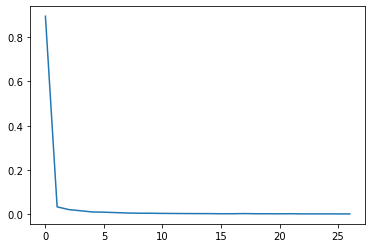

25/25 - 1s - loss: 0.0179 - mse: 0.0179
Testing set Mean Square Error:  0.02 MPG


In [42]:
model, x_test, y_test = _train('F', images, outputs)

25/25 [==============================] - 1s 24ms/step


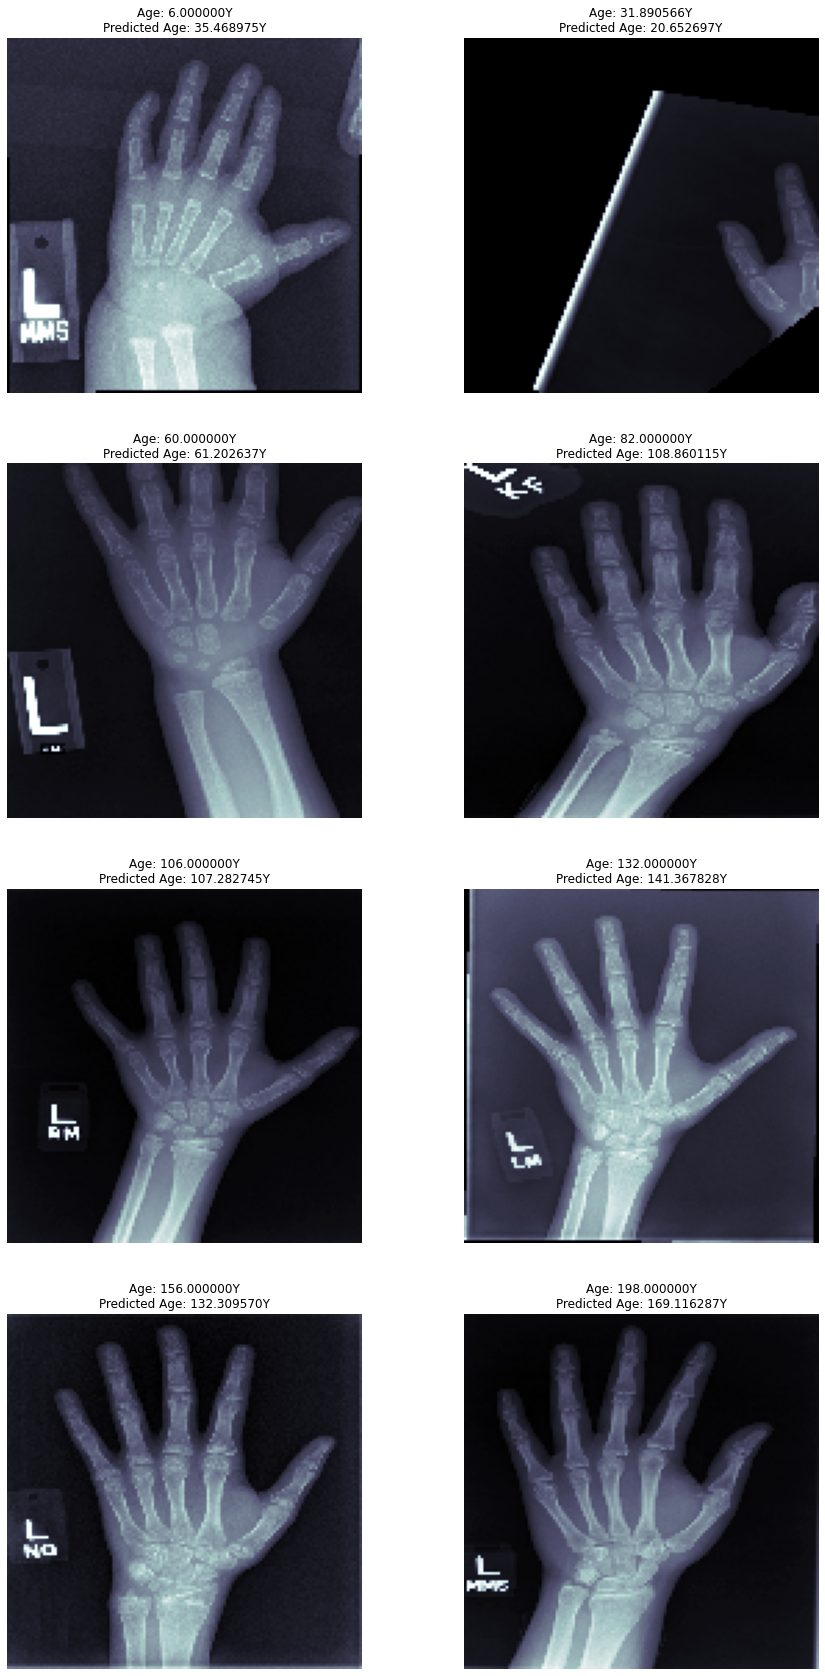

In [43]:
max_bornage = outputs.max()
predict_boneages = max_bornage * model.predict(x_test, batch_size = 32, verbose = True)
real_boneages = max_bornage * y_test

ord_ind = np.argsort(y_test)
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)]
fig, axs = plt.subplots(4, 2, figsize = (15, 30))
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(x_test[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (real_boneages[ind], 
                                                   predict_boneages[ind]))
    ax.axis('off')
fig.savefig('image_predictions-F.png', dpi = 300)

Text(0, 0.5, 'Predicted Age (Months)')

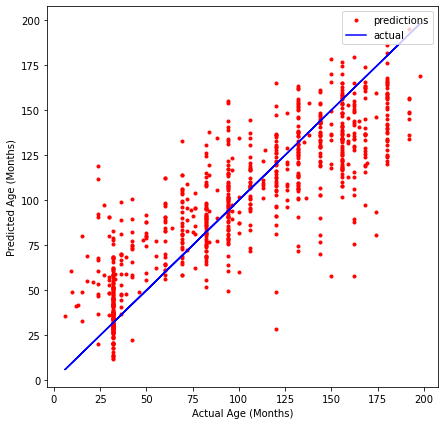

In [44]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(real_boneages, predict_boneages, 'r.', label = 'predictions')
ax.plot(real_boneages, real_boneages, 'b-', label = 'actual')
ax.legend(loc = 'upper right')
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')

In [45]:
df_M = pd.read_csv(f'/kaggle/output/kaggle/working/M-train.csv')
images_M, outputs_M = _prepare_dataset(df_M)

Number images: 5000
Number outputs: 5000
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________

Epoch 1/50
100/100 [==============================] - 10s 104ms/step - loss: 3.1335 - mse: 3.1335 - val_loss: 0.3267 - val_mse: 0.3267
Epoch 2/50
100/100 [==============================] - 11s 111ms/step - loss: 0.3197 - mse: 0.3197 - val_loss: 0.2868 - val_mse: 0.2868
Epoch 3/50
100/100 [==============================] - 10s 97ms/step - loss: 0.2775 - mse: 0.2775 - val_loss: 0.2455 - val_mse: 0.2455
Epoch 4/50
100/100 [==============================] - 10s 98ms/step - loss: 0.2360 - mse: 0.2360 - val_loss: 0.2071 - val_mse: 0.2071
Epoch 5/50
100/100 [==============================] - 10s 98ms/step - loss: 0.2039 - mse: 0.2039 - val_loss: 0.1741 - val_mse: 0.1741
Epoch 6/50
100/100 [==============================] - 10s 97ms/step - loss: 0.1683 - mse: 0.1683 - val_loss: 0.1470 - val_mse: 0.1470
Epoch 7/50
100/100 [==============================] - 10s 100ms/step - loss: 0.1430 - mse: 0.1430 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 8/50
100/100 [==============================] - 10s 9

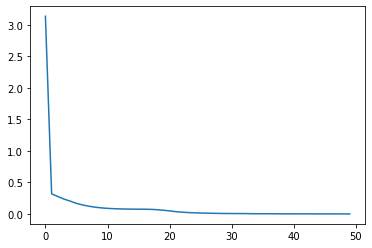

32/32 - 1s - loss: 0.0118 - mse: 0.0118
Testing set Mean Square Error:  0.01 MPG


In [46]:
model_M, x_test_M, y_test_M = _train('M', images_M, outputs_M)

32/32 [==============================] - 1s 24ms/step


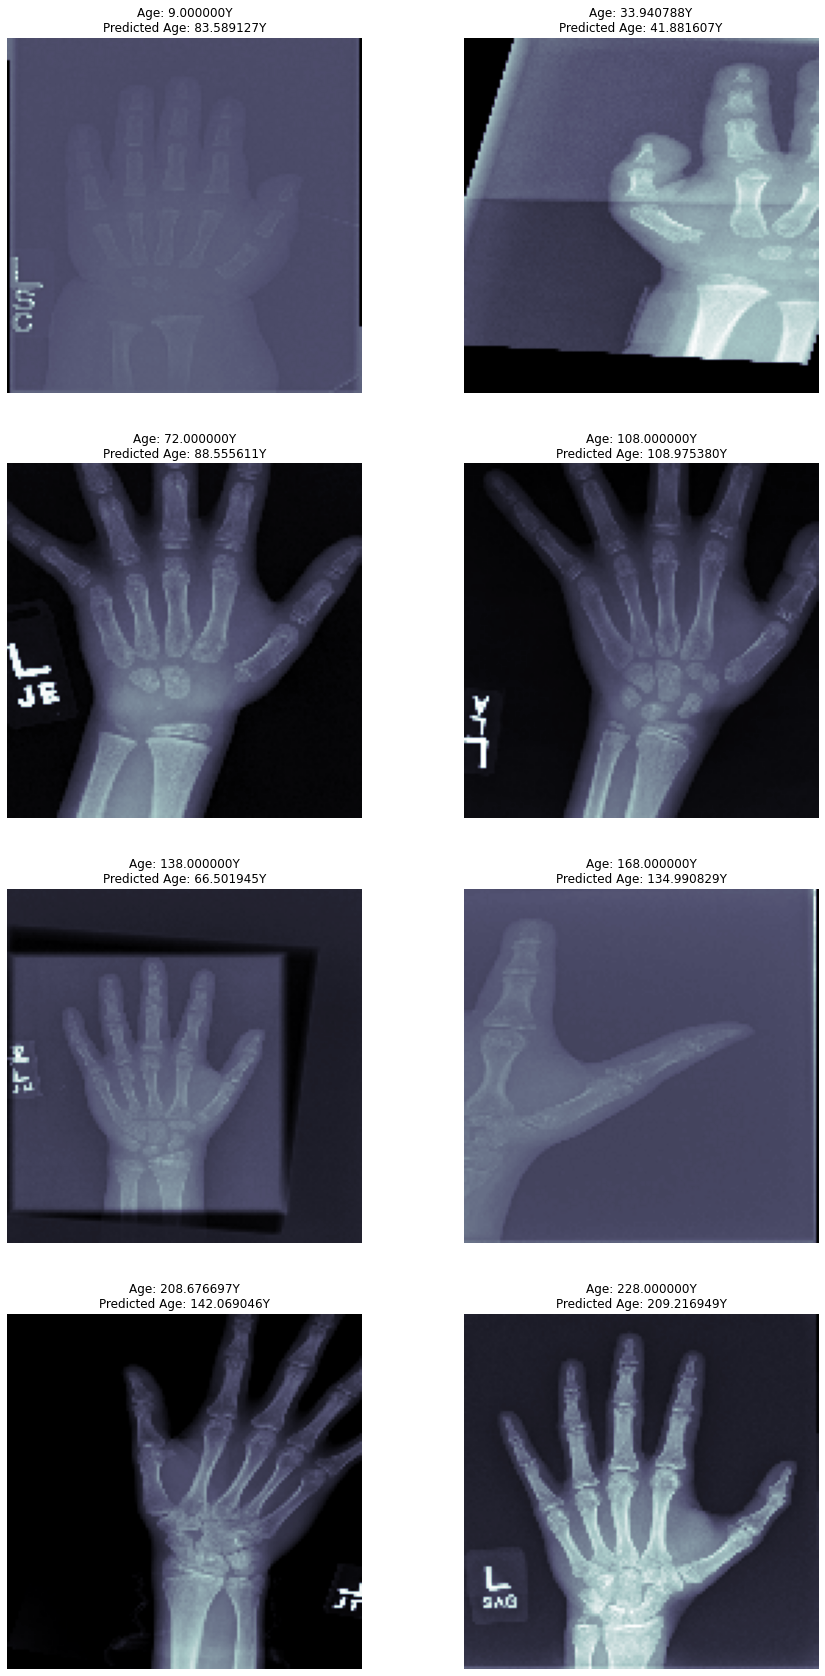

In [47]:
max_bornage_M = outputs_M.max()
predict_boneages_M = max_bornage_M * model.predict(x_test_M, batch_size = 32, verbose = True)
real_boneages_M = max_bornage_M * y_test_M

ord_ind = np.argsort(y_test_M)
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)]
fig, axs = plt.subplots(4, 2, figsize = (15, 30))
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(x_test_M[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (real_boneages_M[ind], 
                                                   predict_boneages_M[ind]))
    ax.axis('off')
fig.savefig('image_predictions-M.png', dpi = 300)

Text(0, 0.5, 'Predicted Age (Months)')

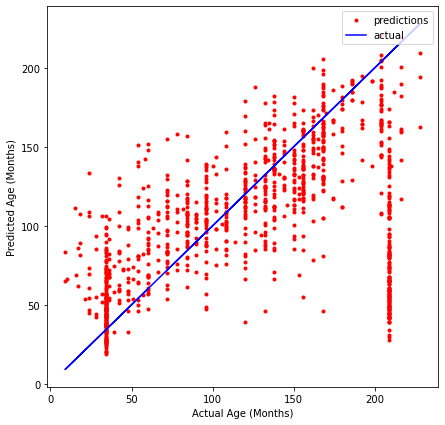

In [48]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(real_boneages_M, predict_boneages_M, 'r.', label = 'predictions')
ax.plot(real_boneages_M, real_boneages_M, 'b-', label = 'actual')
ax.legend(loc = 'upper right')
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')

# Results

We run dataset in diferents models, filter to girls and boys.

In [49]:
df_submission = pd.read_csv('/kaggle/input/i2a2-bone-age-regression/sample_submission.csv')
df_submission.head()

,fileName,patientSex,boneage
0,8B2563DD-1B74-4F22-A2DC-46CCF7B58920.png,F,111.606890
1,34E48F6E-144E-4E36-9996-71B797A5E348.png,F,170.459629
2,601B717A-3548-42E2-BBB7-20C9DB598332.png,F,72.230273
3,933BBD2E-2E42-4E46-8CE6-EE89688D9C1E.png,F,182.893253
4,992B3882-02C9-493D-BC4A-C4015E1297A3.png,F,207.787241


In [51]:
normalize_images('sample_submission')

contours 107
width 1002
contours 166
width 855
contours 71
width 833
contours 353
width 986
contours 160
width 571
contours 165
width 924
contours 378
width 938
contours 10
width 901
contours 14
width 981
contours 66
width 1014
contours 201
width 615
contours 310
width 910
contours 10
width 943
contours 206
width 1019
contours 335
width 1024
contours 873
width 1023
contours 162
width 814
contours 241
width 525
contours 600
width 814
contours 924
width 1024
contours 1087
width 707
contours 237
width 843
contours 136
width 815
contours 57
width 663
contours 7
width 866
contours 603
width 1007
contours 1836
width 1004
contours 311
width 866
contours 23
width 825
contours 190
width 788
contours 455
width 850
contours 245
width 1016
contours 405
width 923
contours 912
width 1004
contours 816
width 1019
contours 173
width 428
contours 165
width 765
contours 595
width 814
contours 246
width 610
contours 410
width 767
contours 328
width 825
contours 257
width 1004
contours 632
width 816
contou

In [56]:
df_girls = df_submission.query('patientSex == "F"')
X_girls, Y_girls = _prepare_dataset(df_girls)

# normalize
X_girls = X_girls.astype('float32')/255

max_bornage_girls = Y_girls.max()
Y_girls = Y_girls / max_bornage_girls

In [53]:
model_girls = init_model('F', df_girls)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

Using network trained!


In [62]:
predicted = model_girls.predict_generator(X_girls)
predicted_months = max_bornage_girls*(predicted.flatten())

filenames = df_girls['fileName']
results_girls = pd.DataFrame({"fileName": filenames,
                      "boneage": predicted_months})

results_girls.head()

,fileName,boneage
0,8B2563DD-1B74-4F22-A2DC-46CCF7B58920.png,132.459198
1,34E48F6E-144E-4E36-9996-71B797A5E348.png,59.391769
2,601B717A-3548-42E2-BBB7-20C9DB598332.png,57.170139
3,933BBD2E-2E42-4E46-8CE6-EE89688D9C1E.png,111.484940
4,992B3882-02C9-493D-BC4A-C4015E1297A3.png,131.479019


In [61]:
df_boys = df_submission.query('patientSex == "M"')
X_boys, Y_boys = _prepare_dataset(df_boys)

# normalize
X_boys = X_boys.astype('float32')/255

max_bornage_boys = Y_boys.max()
Y_boys = Y_boys / max_bornage_boys

In [63]:
model_boys = init_model('M', df_boys)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

Using network trained!


In [64]:
predicted = model_boys.predict_generator(X_boys)
predicted_months = max_bornage_boys*(predicted.flatten())

filenames = df_boys['fileName']
results_boys = pd.DataFrame({"fileName": filenames,
                      "boneage": predicted_months})

results_boys.head()

,fileName,boneage
5,14EA0871-C9A6-4F0E-AEDA-3D527B348BFD.png,144.768814
6,491B861C-630F-4EE2-9E75-EC8EFA71584D.png,103.226547
11,A7AFE3FB-AF8B-492E-BD22-8FFE07AE9193.png,61.041149
15,93F22EC8-7D50-4C7C-B230-F9C39FE6510D.png,175.711044
18,30CA5561-6EDD-45DC-A0E9-79B7A47E568E.png,147.888351


In [65]:
results = pd.concat([results_girls, results_boys], ignore_index=True)

In [66]:
results.to_csv("results.csv",index=False)